![Concrete Compressive Prediction](Concrete_Compressive_Strength_Prediction.jpg)

# Concrete Compressive Strength Predction - ML Project

---------------------------------

# Data Type: multivariate
 
>Abstract: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and  ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------
# Sources: 

  `Original Owner and Donor`
  `Prof. I-Cheng Yeh`
  `Department of Information Management` 
  `Chung-Hua University, `
  `Hsin Chu, Taiwan 30067, R.O.C.`
  `e-mail:icyeh@chu.edu.tw`
  `TEL:886-3-5186511`

  `Date Donated: August 3, 2007`
 
---------------------------------

# Data Characteristics:
    
>The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

# Summary Statistics: 

`Number of instances (observations): 1030`
`Number of Attributes: 9`
`Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable`
`Missing Attribute Values: None`

---------------------------------

# Variable Information:

>Given is the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing  corresponds to the order of numerals along the rows of the database. 

* `Name -- Data Type -- Measurement -- Description`

* `Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable`
* `Age -- quantitative -- Day (1~365) -- Input Variable`
* `Concrete compressive strength -- quantitative -- MPa -- Output Variable `
---------------------------------

# Past Usage: 

## Main
> 1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial  neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

## Others
>2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).

>3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks," J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).

>4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of  Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic  Engineering, Vol. 15, No. 4, pp. 659-663 (2003).

>5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 1, pp. 77-84 (2003).

>6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and neural networks,": Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, pp.597-604 ?2006?.

---------------------------------

## Acknowledgements, Copyright Information, and Availability:

### NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

### I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)

## Life cycle of Machine learning Project

* `Understanding the Problem Statement`
* `Data Collection`
* `Data Checks to perform`
* `Exploratory data analysis`
* `Data Pre-Processing (Feature Engineering and Feature Selection)`
* `Model Training`
* `Hypeparameter Tuning`
* `Choose best model`

# `Understanding the Problem Statement`:
>The quality of concrete is determined by its compressive strength, which is measured using a conventional crushing test on a concrete cylinder. The strength of the concrete is also a vital aspect in achieving the requisite longevity. It will take 28 days to test strength, which is a long period. So, what will we do now? We can save a lot of time and effort by using Data Science to estimate how much quantity of which raw material we need for acceptable compressive strength.

In [17]:
#importing necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")


# `Data Collection`

In [18]:
# URL of the Excel file
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'

# Read the Excel file from the URL using pandas
df = pd.read_excel(file_url)

# Define the mapping of old column names to new column names
column_mapping = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast_Furnace_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine_Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Compressive_Strength'
}

# Rename the columns in the DataFrame
df = df.rename(columns=column_mapping)

# Define the file path to save the CSV file
file_path = './data/concrete_data.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)


#### Show Top 5 Records

In [19]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#  `Data Checks to perform`

In [20]:
def explore_data(data):
    # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Check for duplicates
    duplicates = data.duplicated().sum()
    print("\nNumber of Duplicates:", duplicates)

    # Check data types
    data_types = data.dtypes
    print("\nData Types:\n", data_types)

    # Check the number of unique values of each column
    unique_values = data.nunique()
    print("\nNumber of Unique Values:\n", unique_values)

    # Check statistics of the dataset
    data_stats = data.describe()
    print("\nData Statistics:\n", data_stats)

    # Exploring the data
    print("\nData Head:")
    print(data.head())

    print("\nData Tail:")
    print(data.tail())

    print("\nData Sample:")
    print(data.sample(5))


In [21]:
explore_data(df)

Missing Values:
 Cement                  0
Blast_Furnace_Slag      0
Fly_Ash                 0
Water                   0
Superplasticizer        0
Coarse_Aggregate        0
Fine_Aggregate          0
Age                     0
Compressive_Strength    0
dtype: int64

Number of Duplicates: 25

Data Types:
 Cement                  float64
Blast_Furnace_Slag      float64
Fly_Ash                 float64
Water                   float64
Superplasticizer        float64
Coarse_Aggregate        float64
Fine_Aggregate          float64
Age                       int64
Compressive_Strength    float64
dtype: object

Number of Unique Values:
 Cement                  280
Blast_Furnace_Slag      187
Fly_Ash                 163
Water                   205
Superplasticizer        155
Coarse_Aggregate        284
Fine_Aggregate          304
Age                      14
Compressive_Strength    938
dtype: int64

Data Statistics:
             Cement  Blast_Furnace_Slag      Fly_Ash        Water   
count  1030.000

**Data Insights Report**

>I have analyzed the dataset provided and gathered the following insights:

 `1. Missing Values: There are no missing values in the dataset. This means that all the columns have complete data.`

 `2. Duplicates: We have identified 25 duplicate rows in the dataset. It is recommended to investigate these duplicates further to ensure data integrity.`

 `3. Data Types: The dataset consists of numerical data. Most of the columns are of float data type, except for the "Age" column which is of integer data type.`

 `4. Number of Unique Values: Each column in the dataset has a varying number of unique values. The "Cement" column has 280 unique values, "Blast Furnace Slag" has 187 unique values, "Fly Ash" has 163 unique values, "Water" has 205 unique values, "Superplasticizer" has 155 unique values, "Coarse Aggregate" has 284 unique values, "Fine Aggregate" has 304 unique values, "Age" has 14 unique values, and "Compressive Strength" has 938 unique values.`

 `5. Data Statistics: The dataset's statistical summary provides insights into the central tendency, variability, and distribution of the data. The mean and standard deviation for each column give an idea about the average values and the spread of the data. Additionally, percentiles (25%, 50%, and 75%) provide information about the distribution of values.`

 `6. Exploring the Data: We have displayed the first five rows, last five rows, and a sample of five rows from the dataset. This gives you a glimpse of the data and its structure.`

>Based on these insights, we can conclude that the dataset is relatively clean with no missing values. However, there are some duplicate rows that need to be addressed. The data types seem appropriate for the given columns. The unique values in each column highlight the diversity of the dataset. The statistical summary provides an overview of the data distribution and helps identify any outliers or unusual patterns.

# `Exploratory data analysis`

In [22]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [23]:
# lets drop the 25 duplicate records from the dataset.
df.drop_duplicates(inplace=True)

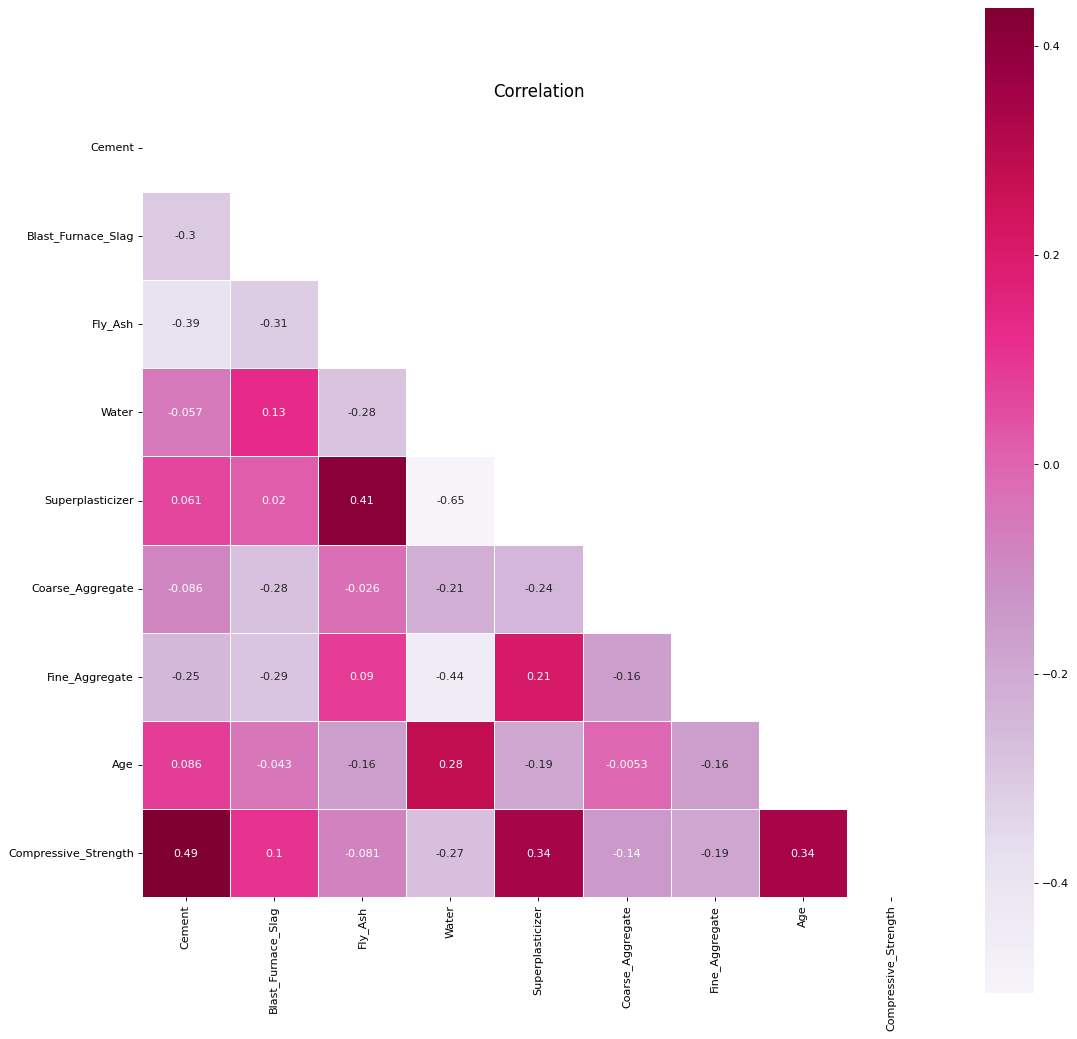

In [24]:
# Corelation of the data
plt.figure(figsize=(16,16),dpi=80)
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PuRd', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()


# `Univariate data analysis`

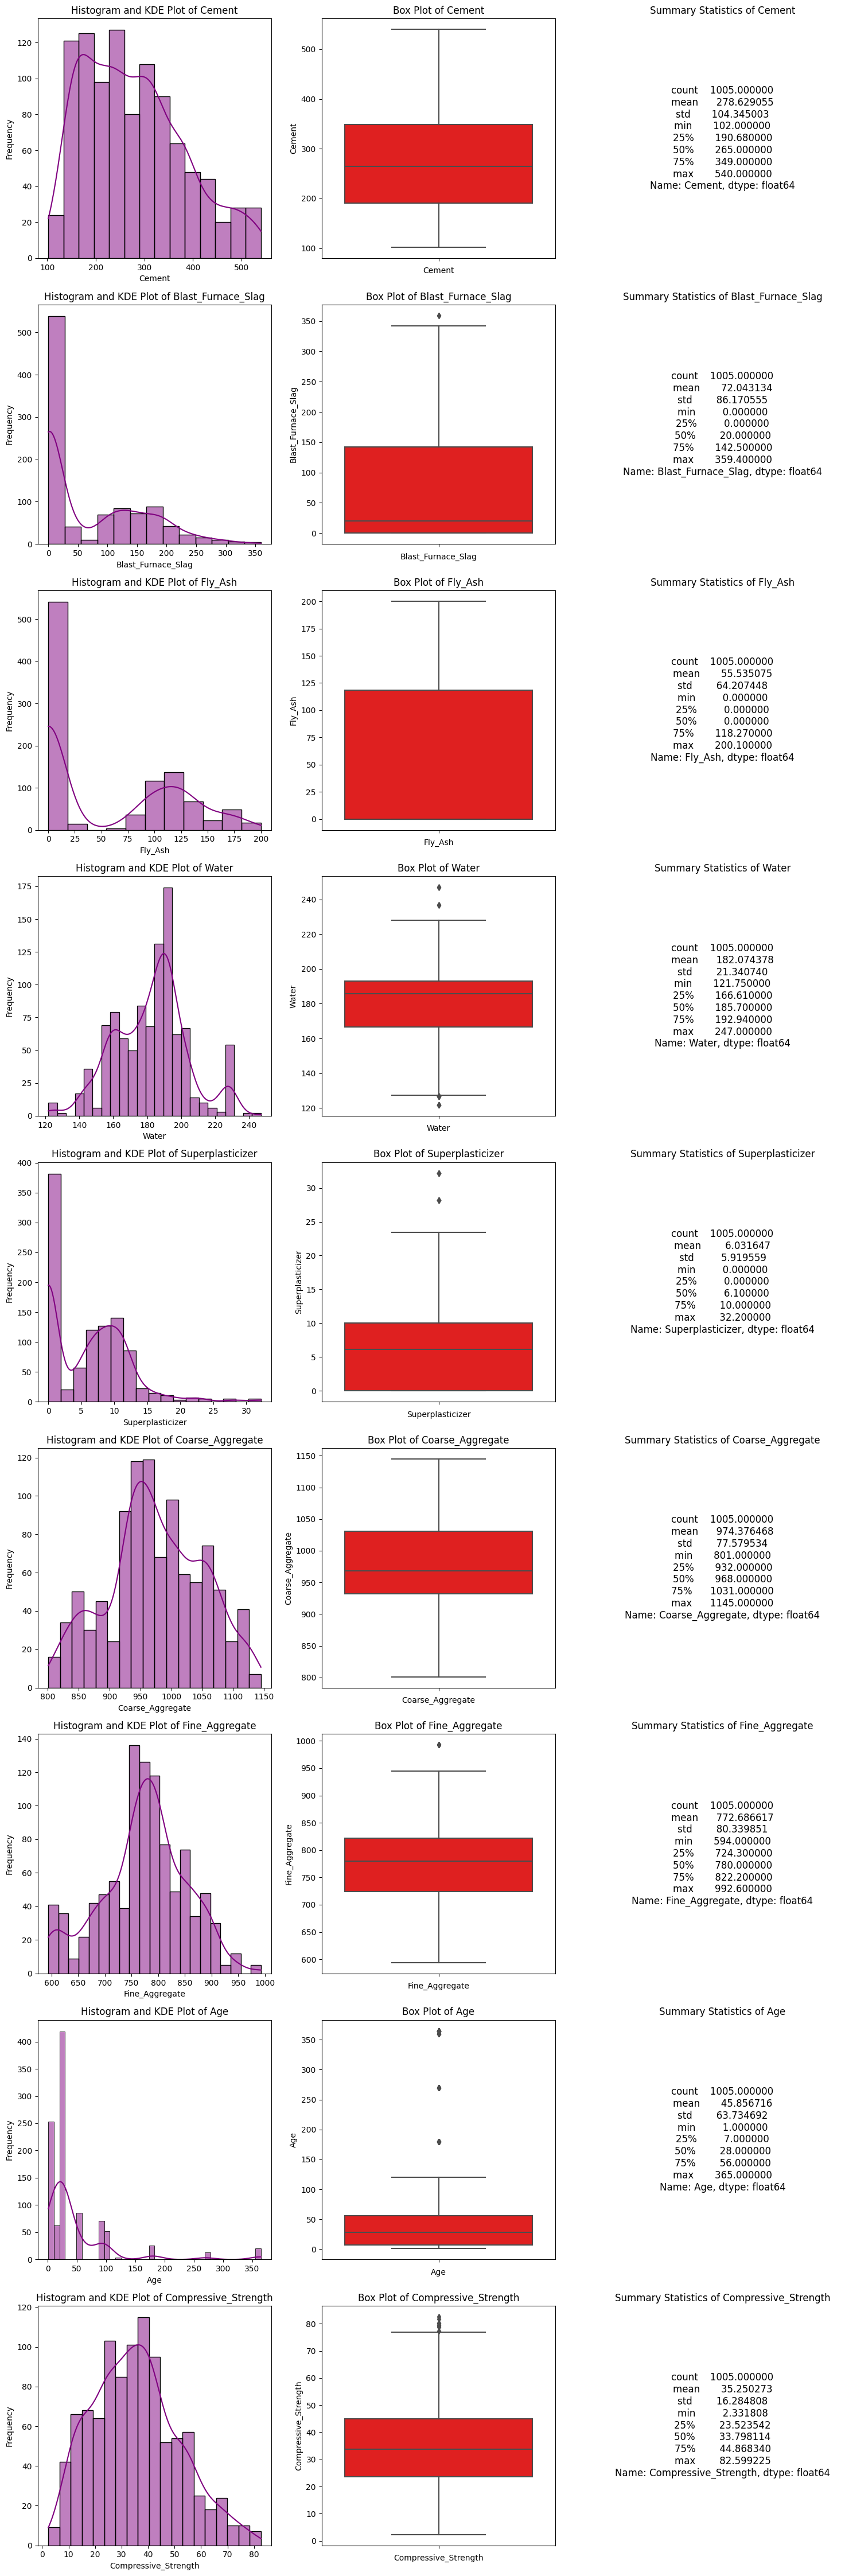

In [25]:
def analyze_univariate(data):
    """
    Perform univariate analysis on each column in the DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame.

    Returns:
        None
    """
    num_cols = len(data.columns)
    fig, axes = plt.subplots(num_cols, 3, figsize=(15, num_cols*5))
    plt.subplots_adjust(hspace=0.5)

    # Iterate over each column in the DataFrame
    for i, column in enumerate(data.columns):
        # Perform univariate analysis for the column
        univariate_analysis(data, column, axes[i])

    plt.tight_layout()
    plt.show()

def univariate_analysis(data, column, axes):
    """
    Perform univariate analysis on a single column of the DataFrame.

    Parameters:
        data (DataFrame): The input DataFrame.
        column (str): The name of the column to analyze.
        axes (matplotlib.axes._subplots.AxesSubplot): The axes to plot the analysis.

    Returns:
        None
    """
    # Summary statistics
    stats = data[column].describe()

    # Histogram with KDE
    sns.histplot(data=data, x=column, kde=True, color='purple', edgecolor='black', ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Histogram and KDE Plot of " + column)

    # Box plot
    sns.boxplot(data=data, y=column, color='red', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_title("Box Plot of " + column)

    # Summary statistics text
    axes[2].text(0.5, 0.5, str(stats), fontsize=12, ha='center', va='center')
    axes[2].axis('off')
    axes[2].set_title("Summary Statistics of " + column)


analyze_univariate(df)


# Insights from the above:

1. Skewness:
   - Cement: The distribution of cement is moderately positively skewed, indicating a longer right tail.
   - Blast Furnace Slag: The distribution of blast furnace slag is moderately positively skewed, indicating a longer right tail.
   - Fly Ash: The distribution of fly ash exhibits slightly positive skewness.
   - Water: The distribution of water is approximately symmetric, with negligible skewness.
   - Superplasticizer: The distribution of superplasticizer is highly positively skewed, indicating a significantly longer right tail.
   - Coarse Aggregate: The distribution of coarse aggregate is approximately symmetric, with negligible skewness.
   - Fine Aggregate: The distribution of fine aggregate is approximately symmetric, with negligible skewness.
   - Age: The distribution of age is highly positively skewed, indicating a significantly longer right tail.
   - Compressive Strength: The distribution of compressive strength is approximately symmetric, with negligible skewness.

2. Cement, Blast Furnace Slag, and Fly Ash:
   - The distributions of cement, blast furnace slag, and fly ash are positively skewed, indicating a concentration of lower values and a tail of higher values. This suggests that the majority of data points fall within a specific range, with a few extreme values.

3. Water, Coarse Aggregate, and Fine Aggregate:
   - The distributions of water, coarse aggregate, and fine aggregate are approximately symmetric, indicating a relatively balanced spread of values.

4. Superplasticizer:
   - The distribution of superplasticizer is highly positively skewed, suggesting a significant concentration of lower values and a long tail of higher values. This indicates that the majority of data points have low superplasticizer values, with a few outliers having exceptionally high values.

5. Age:
   - The distribution of age is highly positively skewed, indicating a concentration of lower ages and a tail of higher ages. This suggests that the majority of data points correspond to a relatively young age, with a few instances of significantly higher ages.

6. Compressive Strength:
   - The distribution of compressive strength is approximately symmetric, indicating a relatively balanced spread of values.

>These insights provide an overview of the skewness and distribution characteristics of each variable in the dataset, helping to understand the data's underlying patterns and potential outliers.

In [26]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# `Pair Plot`

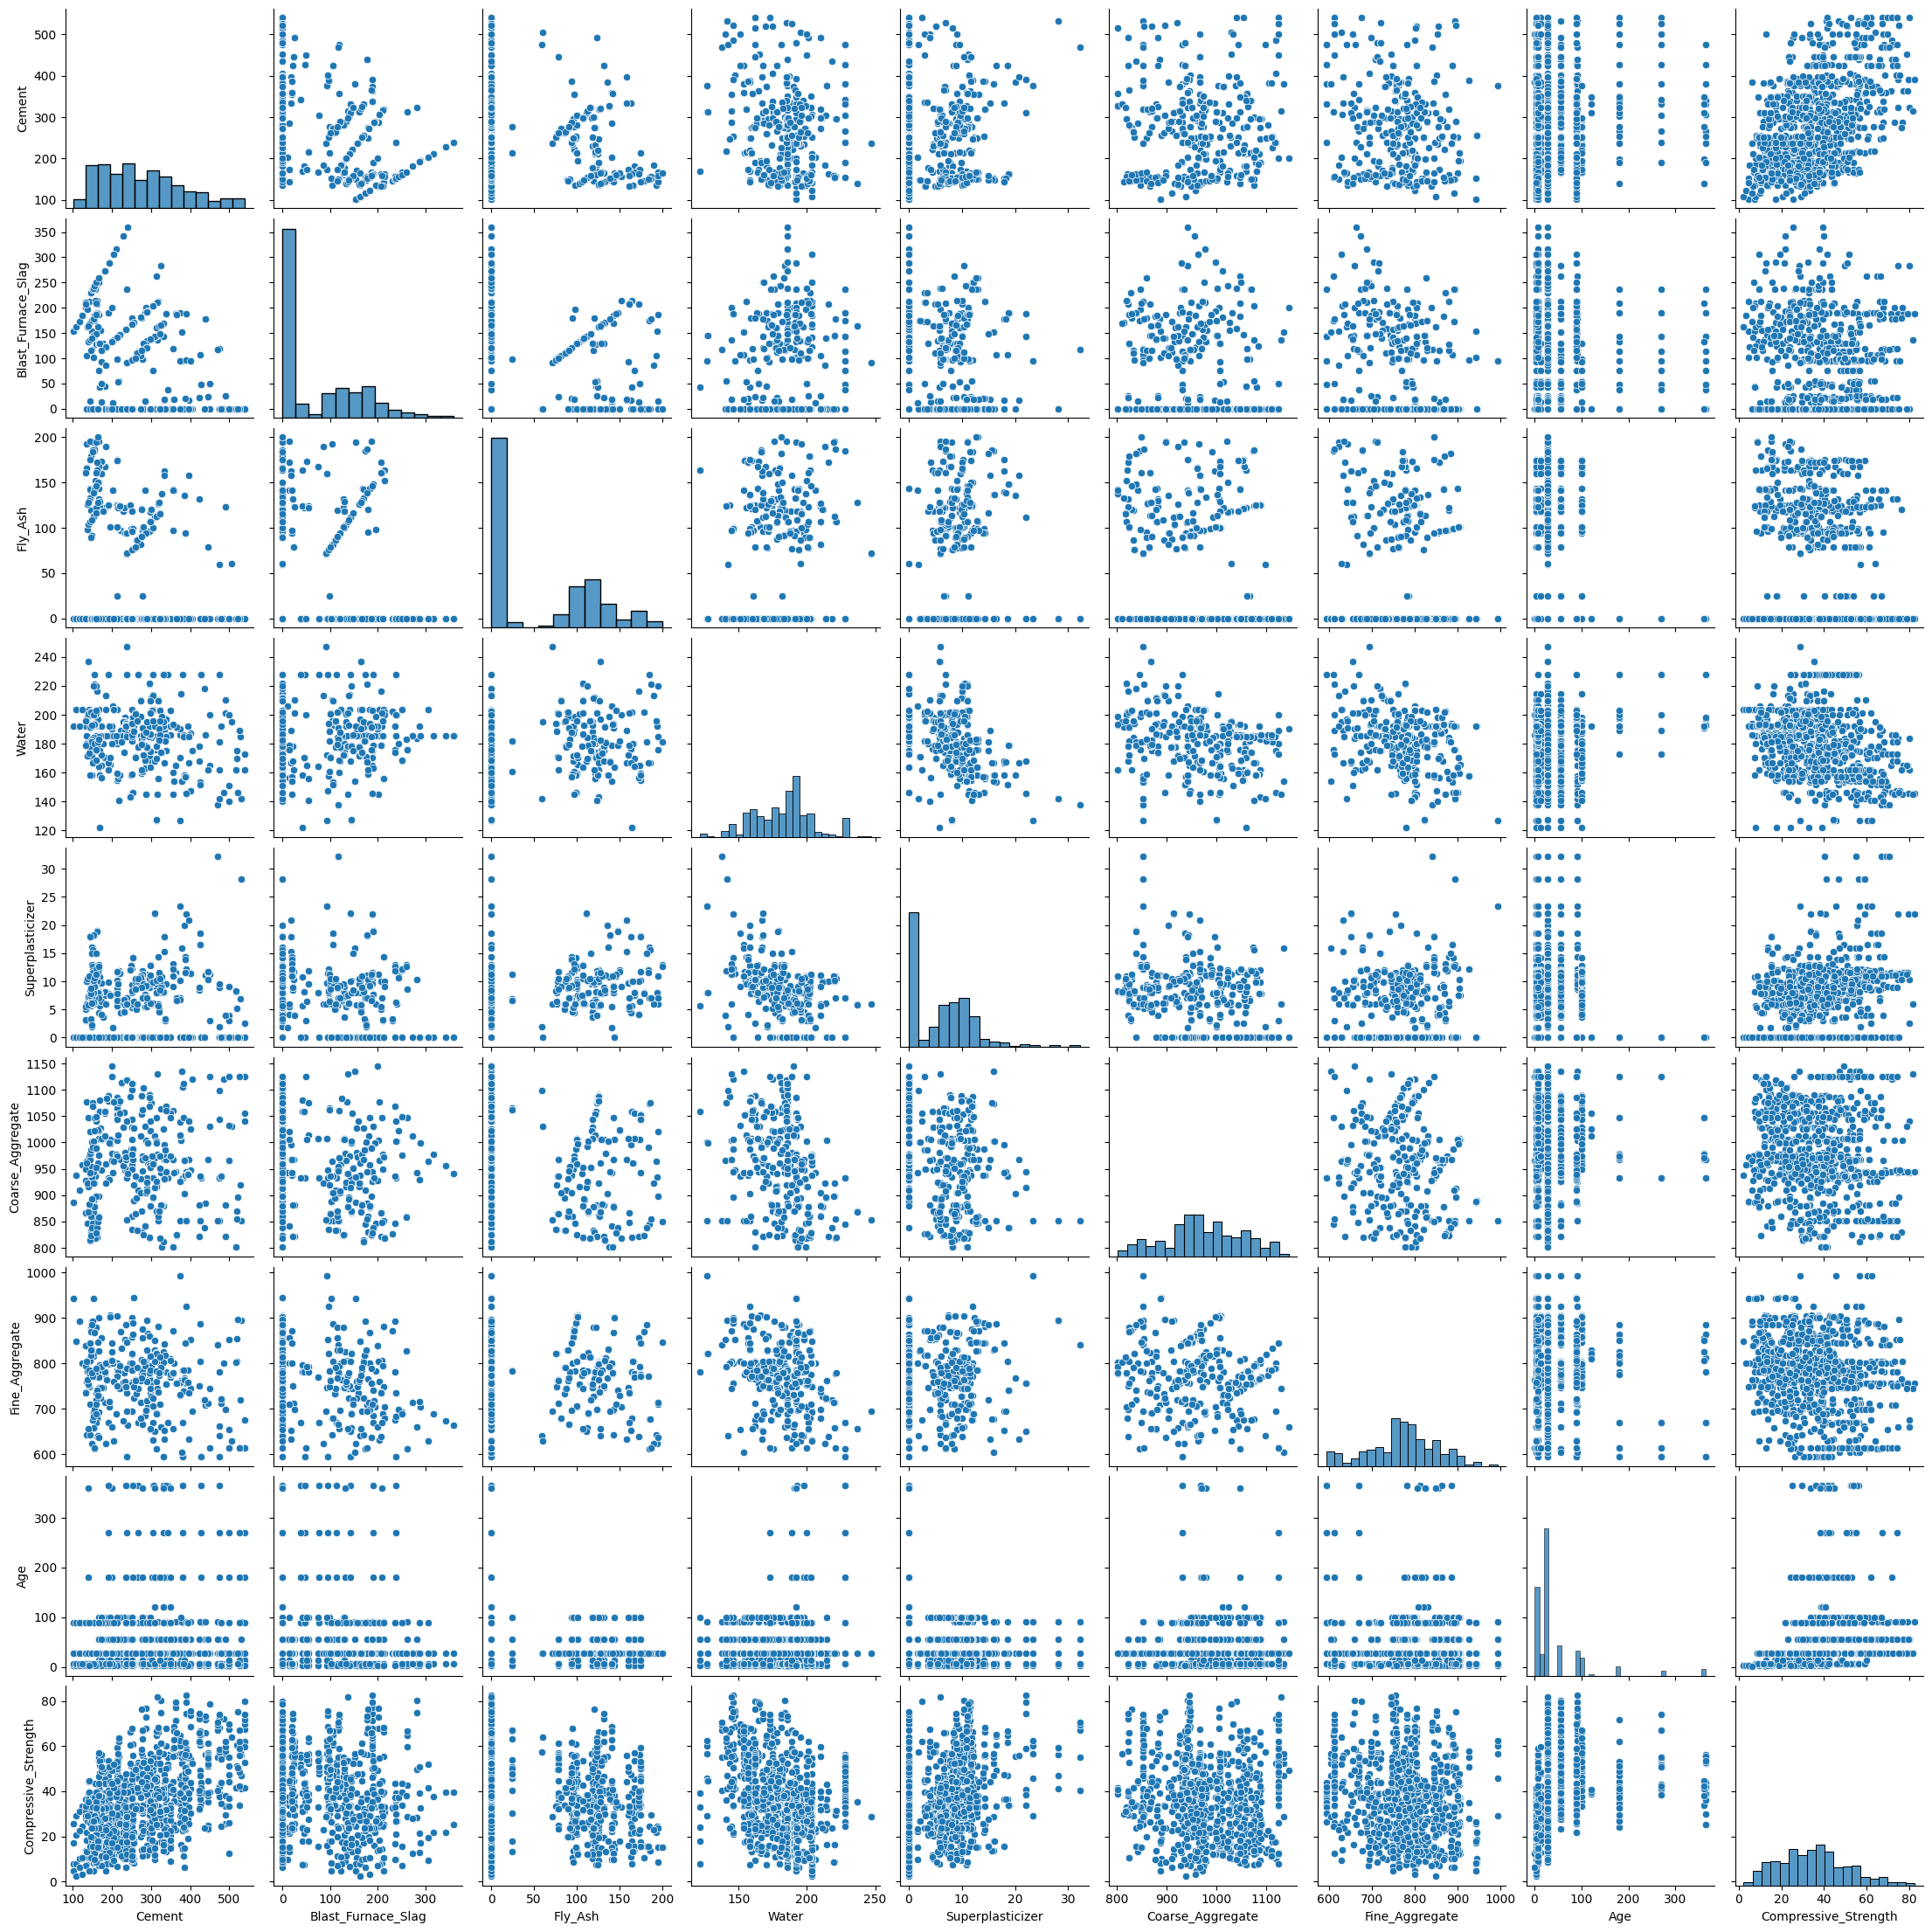

In [27]:
def generate_pairplot(data):
    sns.pairplot(data)

generate_pairplot(df)

# `Bivariate data analysis`

In [28]:
def bivariate_analysis(data, x, y, hue=None, style=None):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, style=style, palette='Set1')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Bivariate Analysis: {} vs {}".format(x, y))
    plt.legend()
    plt.show()


In [29]:
list(df)

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age',
 'Compressive_Strength']

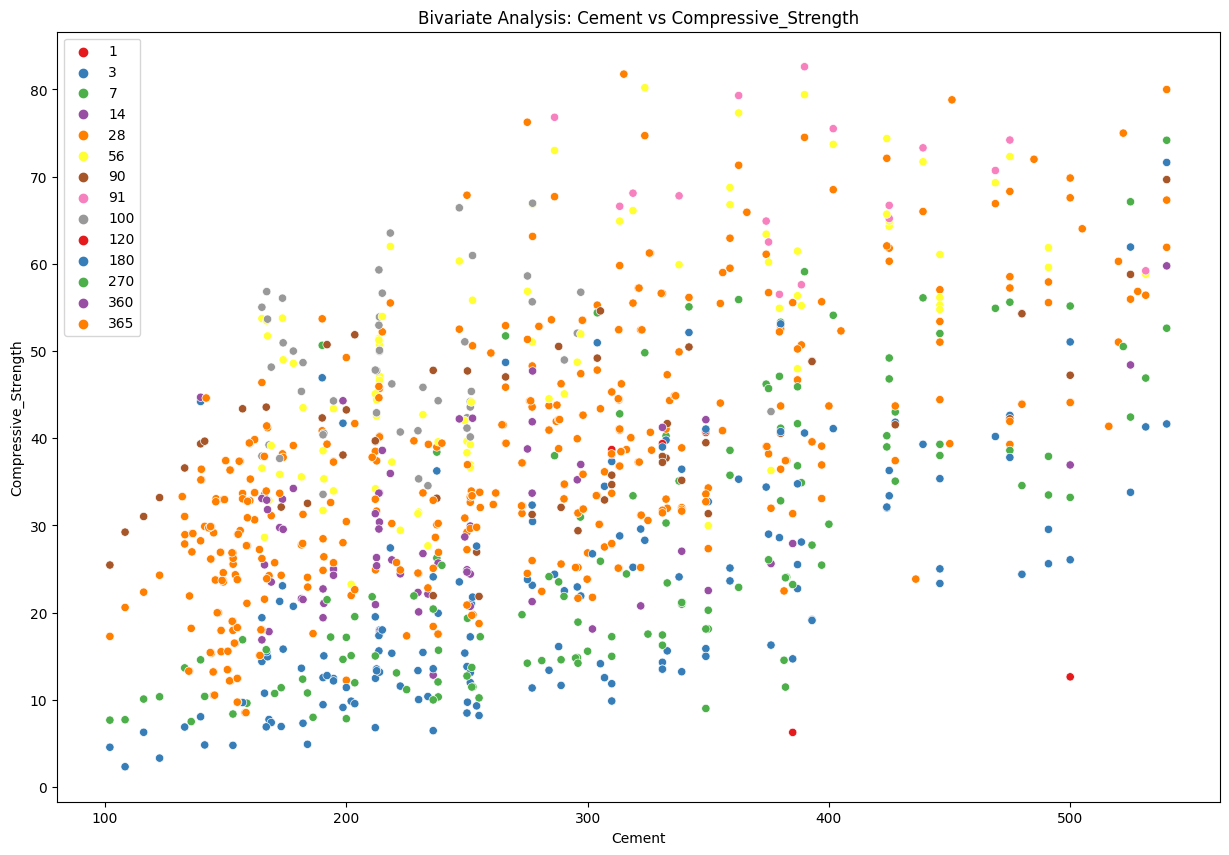

In [32]:
bivariate_analysis(df, 'Cement', 'Compressive_Strength', hue='Age', style=None)


# Insights from the above:
 `It is noticed that there is a positive relationship in between Cement and Comressive strength.`

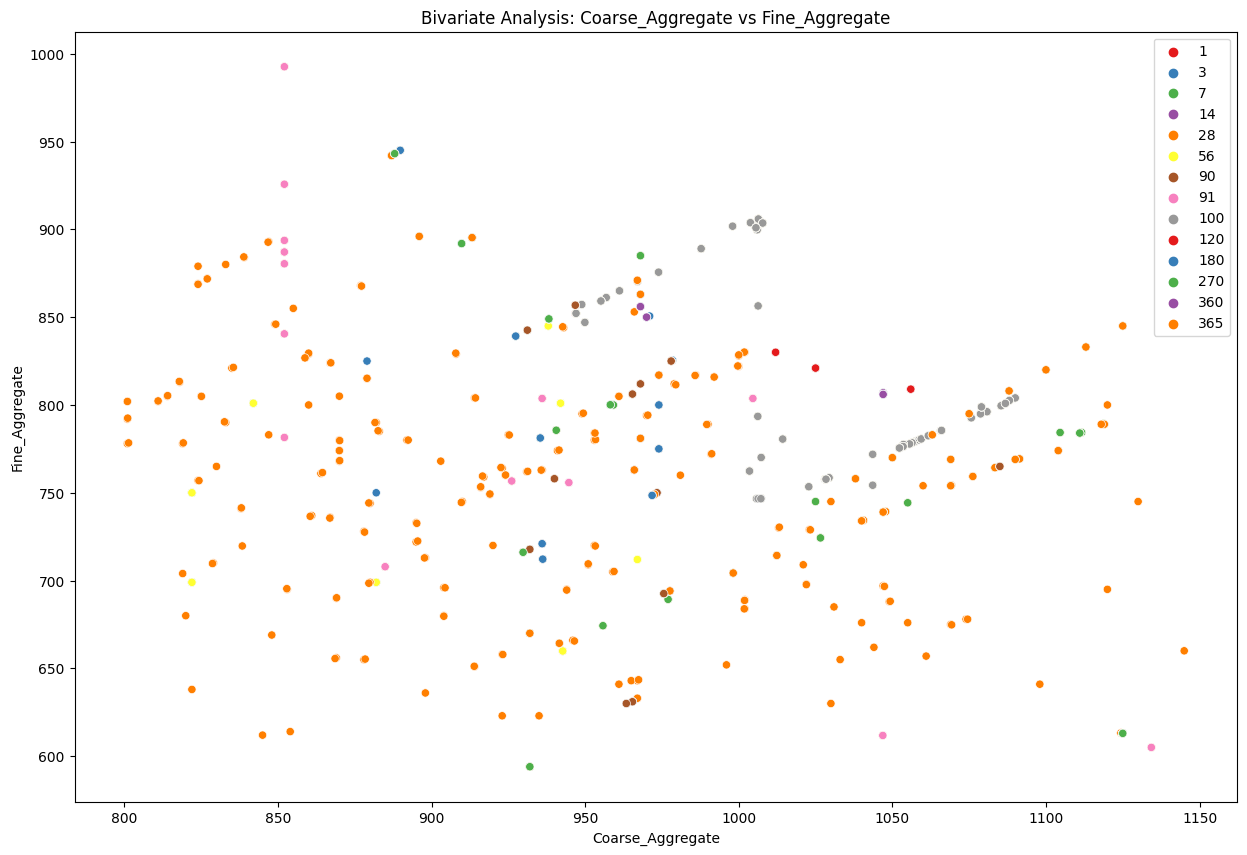

In [33]:
bivariate_analysis(df, 'Coarse_Aggregate', 'Fine_Aggregate', hue='Age', style=None)


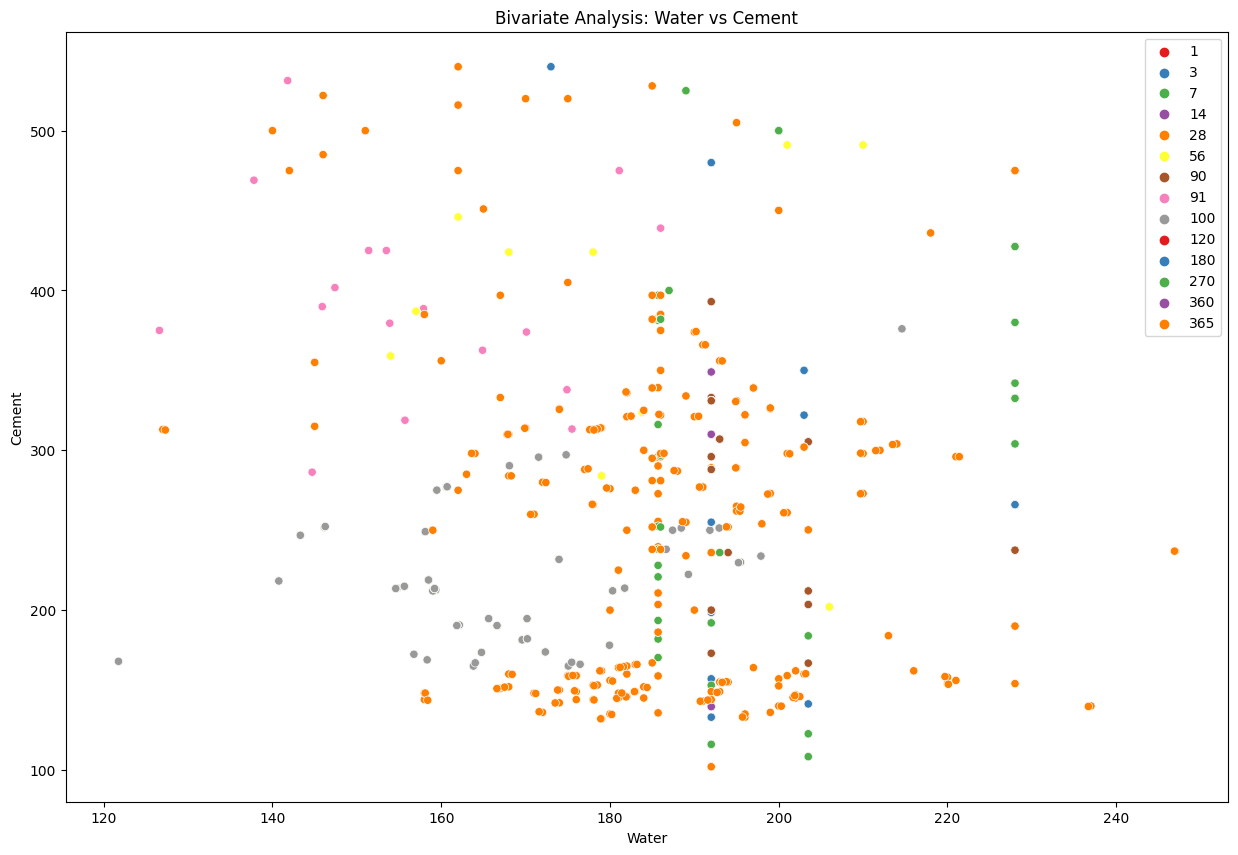

In [34]:
bivariate_analysis(df, 'Water', 'Cement', hue='Age', style=None)


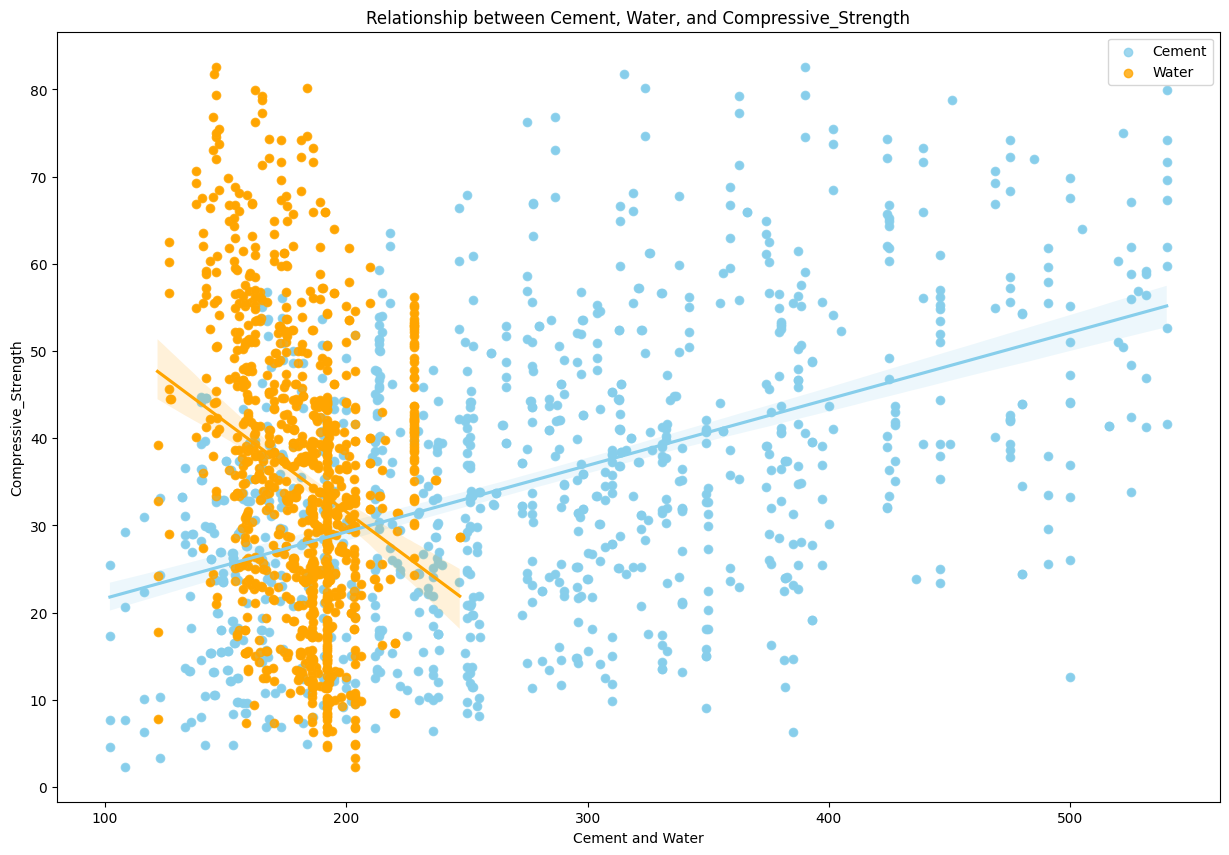

In [35]:
# Scatter plot with linear regressions
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Cement', y='Compressive_Strength', color='skyblue')
sns.scatterplot(data=df, x='Water', y='Compressive_Strength', color='orange')
sns.regplot(data=df, x='Cement', y='Compressive_Strength', color='skyblue', label='Cement')
sns.regplot(data=df, x='Water', y='Compressive_Strength', color='orange', label='Water')
plt.xlabel('Cement and Water')
plt.ylabel('Compressive_Strength')
plt.title('Relationship between Cement, Water, and Compressive_Strength')
plt.legend()
plt.show()


# Insights from the above:
 `It is noticed that there is a positive relationship in between Cement and Comressive strength. While there is a negetive relationship in between Water and Comressive strength.`

 `There is a concept of Water Cement Ration in Civil Engineering, the lower the w/c ratio the higher the Compressive strength. So lets create a new variable Water Cement Ratio.`

In [36]:
df_copy = df.copy()

In [37]:
df_copy['Water_Cement_Ratio'] = df_copy['Water'] / df_copy['Cement']

In [38]:
df_copy

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength,Water_Cement_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,0.966767
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,0.649783
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,0.608318
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,1.297643
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,1.103708


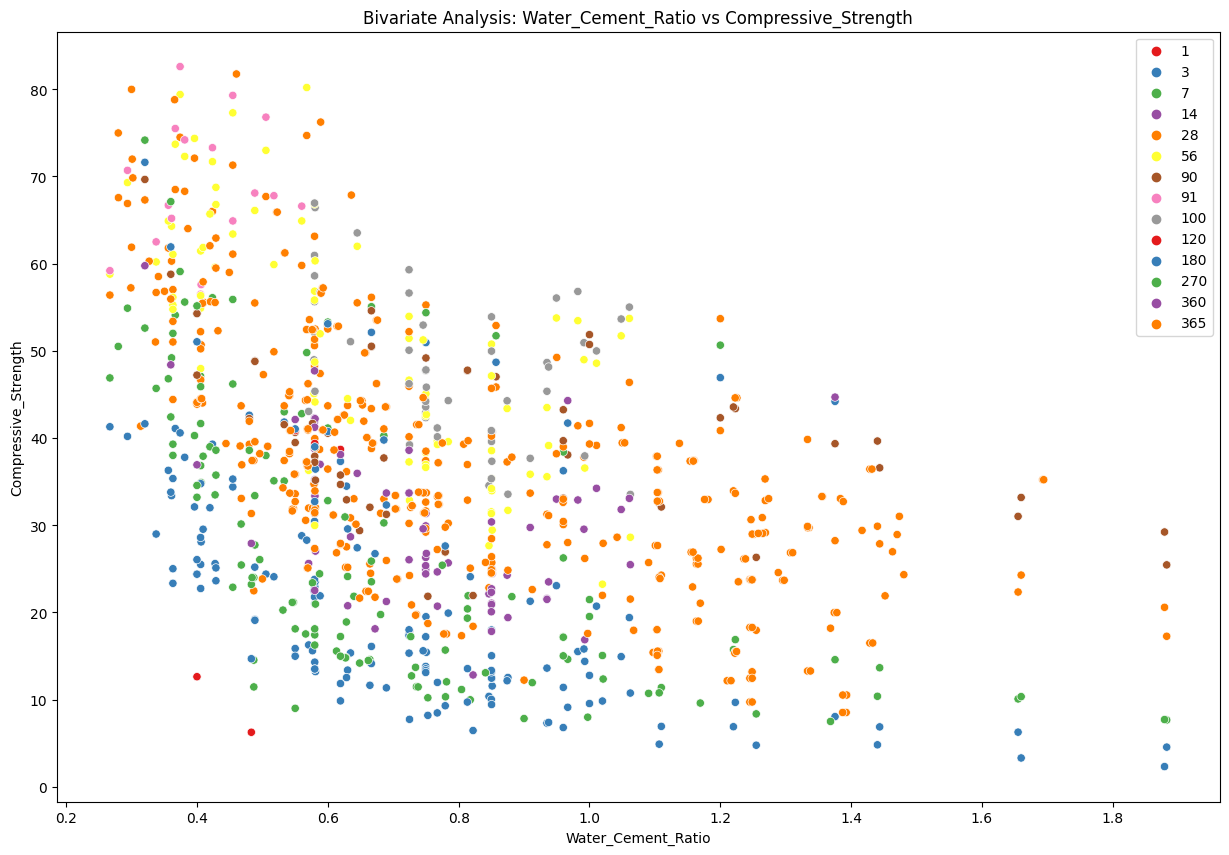

In [39]:
bivariate_analysis(df_copy, 'Water_Cement_Ratio', 'Compressive_Strength', hue='Age', style=None)


# Insights from the above:
 `Now we can definately see thhat, the lower the w/c ratio the higher the Compressive strength.`